# Group assignment

## Energy data analysis

In this assignment, you will work with the `energy.csv` dataset, containing **hourly** data of energy consumption and generation in Spain. This dataset also contains the spot price of electricity.

### Rules for the assignment:

* Deadline: December 6th, 2022, 11pm.
* The group assignment's grade will be graded on the following criteria:
    * 50 %: presentation during Sessions 19 or 20
    * 50 %: answering questions during presentations
* Submission: 1 zip file containing:
    * 1 Jupyter notebook with your code: `group_assignment_group_X.ipynb`
    * 1 PDF file with your presentation
    * Not following these rules will result in a 0 grade for the assignment.
* No freeloaders during Group Assignments: if any of you see that any of your group members is not collaborating you tell me immediately. I will not accept excuses at the end of the course about the performance of any member.
* The presentation will be done by ONE (1) person chosen by the professor at random in the day of the presentations, so you all better work and collaborate to do a good job!
* All the students must be present during the presentations of the rest of the groups. 

### Type here the names of the members of your group

1. ...

### 0. Read the data

Read the data from the `energy.csv` file and store it in a DataFrame called `energy`.

In [26]:
import pandas as pd
import numpy as np

energy = pd.read_csv("energy.csv")

energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,1
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,1
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,1
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,1


In [27]:
# From 18:00 to 05:00 we got the 0 values so we can assume its at night
energy["hour"][(energy["solar"]==0)].unique()

array([], dtype=int64)

In [28]:
#Missing empty with 0
energy["coal"] = energy["coal"].fillna(0)
energy["solar"] = energy["solar"].fillna(0)

In [29]:
energy.isna().sum()

datetime        0
power_demand    0
nuclear         0
gas             0
solar           0
hydro           0
coal            0
wind            0
spot_price      0
year            0
month           0
day             0
hour            0
weekday         0
dtype: int64

### 1. Convert the `weekday` column from a number to a string (1 point)

Knowing that 0 represents Monday, 1 represents Tuesday, etc., convert the `weekday` column from a number to a string. 

Use `map` to perform this operation. You can mix it with a `lambda` function.

In [30]:
# 1. Convert the weekday column from a number to a string (1 point)

dict_weekday_name = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

energy["weekday"] = energy["weekday"].map(lambda m: dict_weekday_name[m])

### 2. Same but for months (1 point)

In [31]:
# 2. Same but for months (1 point)

dict_month_name = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August",
                   9: "September", 10: "October", 11: "November", 12: "December"}

energy["month"] = energy["month"].map(lambda m: dict_month_name[m])

### 3. What's the percentage of *unique* days in the total period in which we had at least one hour with a price below 10 euros? (1 point)

I'm not asking for the percentage of days of the month (represented in the column `day`), but the percentage of *unique* dates in the total period.

Maybe it's interesting to build a new column with the date, not the datetime. You can do this with the `pd.to_datetime` function. Or you can concat columns:

In the end you'll need a column representing the date, not the datetime, not the year, month, day, etc.

In [32]:
# 3. What's the percentage of *unique* days in the total period in which we had at least one hour with a price below 10 euros? (1 point)
energy["date"] = pd.to_datetime(energy["datetime"]).dt.date
rate_of_unique_days_below_10 = energy[(energy["spot_price"] < 10)]["date"].nunique() / energy["date"].nunique()
print(f"The rate is {round(rate_of_unique_days_below_10 * 100,2)} %")

The rate is 4.38 %


### 4. How many hours per month, in average, do we have a price above the monthly average? And below? (1 point)

In [33]:
# 4. How many hours per month, in average, do we have a price above the monthly average? And below? (1 point)
energy_avg_per_month = energy.groupby(["month"])["spot_price"].mean()

energy_merged = pd.merge(energy, energy_avg_per_month, on=["month"], how="left")

below_avg = energy_merged[(
        energy_merged["spot_price_x"] < energy_merged["spot_price_y"]
)
].groupby("month")["hour"].count()

above_avg = energy_merged[(
        energy_merged["spot_price_x"] > energy_merged["spot_price_y"]
)
].groupby("month")["hour"].count()

merged = pd.merge(below_avg, above_avg, on=["month"], how="outer")
merged["sum"] = merged["hour_x"] + merged["hour_y"]
merged.rename(columns={"hour_x":"H_Below_Avg","hour_y":"H_Above_avg"},inplace=True)
merged["perc_below"] = (merged["H_Below_Avg"]/merged["sum"])*100
merged["perc_above"] = 100-merged["perc_below"]
merged

,H_Below_Avg,H_Above_avg,sum,perc_below,perc_above
month,,,,,
April,251,469,720,34.861111,65.138889
August,343,401,744,46.102151,53.897849
December,306,415,721,42.441054,57.558946
February,288,384,672,42.857143,57.142857
January,280,464,744,37.634409,62.365591
July,324,420,744,43.548387,56.451613
June,353,367,720,49.027778,50.972222
March,254,490,744,34.139785,65.860215
May,306,438,744,41.129032,58.870968


### 5. Several questions (1 point)

Qualitative questions:

* Is `gas` generation higher or lower than its hourly average when `wind` generation is above its hourly average?
* Is the `spot_price` higher or lower than its hourly average when `solar` generation is above hourly its average?
* Is the `spot_price` higher or lower than its monthly average when `power_demand` is above its monthly average?


In [34]:
# 5.1. Is `gas` generation higher or lower than its hourly average when `wind` generation is above its hourly average?
wind_hourly = energy.groupby("hour")["wind"].mean()
gas_hourly = energy.groupby("hour")["gas"].mean()
energy_merged = pd.merge(energy, wind_hourly, on=["hour"], how="left")
energy_merged = pd.merge(energy_merged, gas_hourly, on=["hour"], how="left")

energy_merged = energy_merged[
    (energy_merged["wind_x"] > energy_merged["wind_y"])
]

energy_merged["gas_generation"] = np.where(
    energy_merged["gas_x"] < energy_merged["gas_y"],
    "Below",
    "Above"
)

energy_merged.groupby("gas_generation")["hour"].count()

gas_generation
Above     748
Below    2864
Name: hour, dtype: int64

In [35]:
# 5.2. Is the `spot_price` higher or lower than its hourly average when `solar` generation is above hourly its average?

solar_hourly = energy.groupby("hour")["solar"].mean()
spot_price_hourly = energy.groupby("hour")["spot_price"].mean()
energy_merged = pd.merge(energy, solar_hourly, on=["hour"], how="left")
energy_merged = pd.merge(energy_merged, spot_price_hourly, on=["hour"], how="left")

energy_merged = energy_merged[
    (energy_merged["solar_x"] > energy_merged["solar_y"])
]

energy_merged["spot_price_z"] = np.where(
    energy_merged["spot_price_x"] < energy_merged["spot_price_y"],
    "Below",
    "Above"
)

energy_merged.groupby("spot_price_z")["hour"].count()

spot_price_z
Above    1590
Below    1656
Name: hour, dtype: int64

In [36]:
energy_merged = pd.merge(energy, solar_hourly, on=["hour"], how="left")
pd.merge(energy_merged, spot_price_hourly, on=["hour"], how="left")

,datetime,power_demand,nuclear,gas,solar_x,hydro,coal,wind,spot_price_x,year,month,day,hour,weekday,date,solar_y,spot_price_y
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,December,31,23,Monday,2018-12-31,0.812329,45.953123
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,January,1,0,Tuesday,2019-01-01,0.674451,43.228049
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,January,1,1,Tuesday,2019-01-01,0.623901,41.596648
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,January,1,2,Tuesday,2019-01-01,0.592033,40.770907
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,January,1,3,Tuesday,2019-01-01,0.565385,41.056181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,2019-12-30 19:00:00+00:00,31160.6,7106.3,4400.0,0.1,7910.8,685.0,2013.5,47.50,2019,December,30,19,Monday,2019-12-30,16.397802,53.990357
8733,2019-12-30 20:00:00+00:00,31152.9,7106.3,4832.3,0.0,7517.6,681.0,2096.7,46.42,2019,December,30,20,Monday,2019-12-30,1.479121,52.152335
8734,2019-12-30 21:00:00+00:00,29151.0,7105.3,4467.0,0.0,7080.2,698.0,2028.3,42.76,2019,December,30,21,Monday,2019-12-30,1.393407,49.537253
8735,2019-12-30 22:00:00+00:00,26989.6,7107.2,4672.2,0.0,6716.1,626.0,2031.8,40.88,2019,December,30,22,Monday,2019-12-30,0.961538,48.440000


In [37]:
# 5.3. Is the `spot_price` higher or lower than its monthly average when `power_demand` is above its monthly average?

power_demand_monthly = energy.groupby("month")["power_demand"].mean()
spot_price_monthly = energy.groupby("month")["spot_price"].mean()
energy_merged = pd.merge(energy, power_demand_monthly, on=["month"], how="left")
energy_merged = pd.merge(energy_merged, spot_price_monthly, on=["month"], how="left")

energy_merged = energy_merged[
    (energy_merged["power_demand_x"] > energy_merged["power_demand_y"])
]

energy_merged["power_demand_generation"] = np.where(
    energy_merged["spot_price_x"] < energy_merged["spot_price_x"],
    "Below",
    "Above"
)

energy_merged.groupby("power_demand_generation")["month"].count()

power_demand_generation
Above    4509
Name: month, dtype: int64

### 6. Understanding types of power generation (1 point)

The different types of power generation are:
* `nuclear`: nuclear power plants
* `hydro`: hydroelectric power plants
* `wind`: wind power plants
* `solar`: solar power plants
* `gas`: gas power plants
* `coal`: coal power plants

6.1. What's the average contribution of each type of power generation in percentage to the total generation, in the whole period?

6.2. What was the average contribution of each type power generation in percentage in the most expensive month?

6.3. What was the average contribution of each type power generation in percentage in the cheapest month?

In [38]:
energy_total_sum = energy[["nuclear", "hydro", "wind", "solar", "gas", "coal"]].sum()
energy_total_sum.sort_values(ascending = False)

nuclear    55758093.0
wind       53052571.9
gas        51760818.5
hydro      24492328.2
coal       10854073.8
solar       8878077.8
dtype: float64

In [39]:
# 6.1. What's the average contribution of each type of power generation in percentage to the total generation, in the whole period?

energy_total_sum = energy[["nuclear", "hydro", "wind", "solar", "gas", "coal"]].sum().sum()
energy_total = energy[["nuclear", "hydro", "wind", "solar", "gas", "coal"]].sum()
energy_total = pd.DataFrame(energy_total).T

energy_total/ energy_total_sum * 100

,nuclear,hydro,wind,solar,gas,coal
0,27.226168,11.95938,25.905087,4.335084,25.274335,5.299945


In [40]:
# 6.2. What was the average contribution of each type power generation in percentage in the most expensive month?

month = energy.groupby("month")["spot_price"].sum().idxmax()
energy_total = energy.groupby("month", as_index=False).sum()
energy_total = energy_total[
                   (energy_total["month"] == month)
               ].iloc[:, 2:8]

energy_total / energy_total.sum().sum() * 100

,nuclear,gas,solar,hydro,coal,wind
4,25.311538,16.283036,2.311633,10.926689,15.546294,29.620809


In [41]:
energy_total = energy.groupby("month", as_index=False).sum()

energy_total[(energy_total["month"] == month)].iloc[:, 2:8]

,nuclear,gas,solar,hydro,coal,wind
4,5044466.0,3245129.7,460697.2,2177635.9,3098300.6,5903282.8


In [42]:
# 6.3. What was the average contribution of each type power generation in percentage in the cheapest month?

month = energy.groupby("month")["spot_price"].sum().idxmin()
energy_total = energy.groupby("month", as_index=False).sum()
energy_total = energy_total[
                   (energy_total["month"] == month)
               ].iloc[:, 2:8]

energy_total / energy_total.sum().sum() * 100

,nuclear,gas,solar,hydro,coal,wind
2,23.798071,14.985023,2.735952,25.36249,2.245005,30.873459


In [43]:
month

'December'

### 8. Weekends vs weekdays (1 point)

Create a column called `weekend` that is `True` if the day is a weekend and `False` if it's a weekday. Use `np.where` to create this column.

How much expensive in average is a weekend day compared to a weekday?

In [44]:
# 8. Weekends vs weekdays (1 point) (Weekendspotprice/weekdayspotprice)-1*100

energy["weekend"] = np.where(
    energy["weekday"].isin(["Saturday", "Sunday"]),
    True,
    False
)

energy_weekend_avg = energy["spot_price"][(energy["weekend"] == True)].sum()/energy["spot_price"][(energy["weekend"] == True)].count()
energy_weekdays_avg = energy["spot_price"][(energy["weekend"] == False)].sum()/energy["spot_price"][(energy["weekend"] == False)].count()



print(f"On average, there is a {round(((energy_weekend_avg/energy_weekdays_avg)-1)*100,2)}% difference between weekends and weekdays, weekends are cheaper")

On average, there is a -10.43% difference between weekends and weekdays, weekends are cheaper


In [45]:
energy_weekend_demand = energy["power_demand"][(energy["weekend"] == True)].sum()/energy["power_demand"][(energy["weekend"] == True)].count()
energy_weekdays_demand = energy["power_demand"][(energy["weekend"] == False)].sum()/energy["power_demand"][(energy["weekend"] == False)].count()

print(f"On average, there is a {round(((energy_weekend_demand/energy_weekdays_demand)-1)*100,2)}% difference between weekends and weekdays")

On average, there is a -13.5% difference between weekends and weekdays


### 7. Open questions (2 points)

1. What´s the effect of hydroelectric power generation on the price of electricity?
2. What´s the effect of wind power generation on the price of electricity?
3. What´s the effect of solar power generation on the price of electricity?
4. What´s the effect of nuclear power generation on the price of electricity?
5. What´s the effect of gas power generation on the price of electricity?
6. What´s the effect of coal power generation on the price of electricity?

Spoiler: you can plot in `pandas` with `df.plot()`.

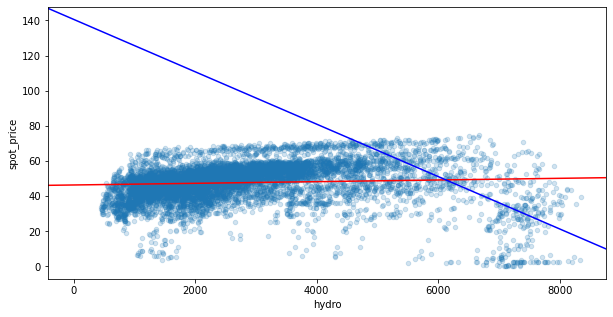

slope of redline is 0.000473464922607686
slope of blue is -0.014909198597689459


In [46]:
import matplotlib.pyplot as plt
x=energy["hydro"]
y=energy["spot_price"]
# 7.1. What´s the effect of hydroelectric power generation on the price of electricity?
energy.plot(y='spot_price',x='hydro',kind="scatter", figsize=(10, 5), alpha=0.2)
m, a = np.polyfit(x, y, deg=1)
z, k = np.polyfit(energy["hydro"][(energy["hydro"]>6000)],energy["spot_price"][(energy["hydro"]>6000)], deg=1)
plt.axline(xy1=(0, a), slope=m, color='r')
plt.axline(xy1=(0, k), slope=z, color='b')
plt.show()
print(f"slope of redline is {m}")
print(f"slope of blue is {z}")

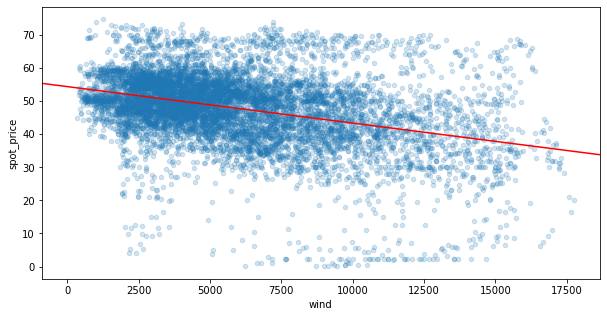

In [47]:
# 7.2. What´s the effect of wind power generation on the price of electricity?
x=energy["wind"]
y=energy["spot_price"]
energy.plot(y='spot_price',x='wind',kind="scatter", figsize=(10, 5), alpha=0.2)
m, a = np.polyfit(x, y, deg=1)
plt.axline(xy1=(0, a), slope=m, color='r')
plt.show()

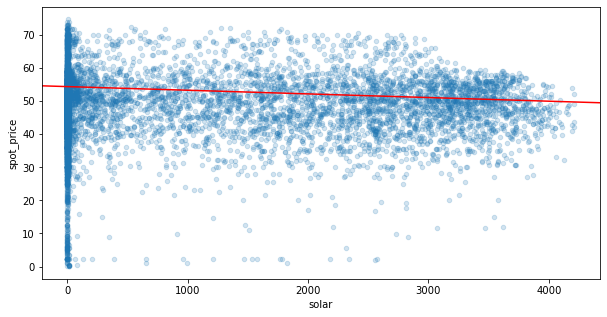

In [48]:
# 7.3. What´s the effect of solar power generation on the price of electricity?
energy.plot(y='spot_price',x='solar',kind="scatter", figsize=(10, 5), alpha=0.2)
m, b = np.polyfit(x, y, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r')
plt.show()

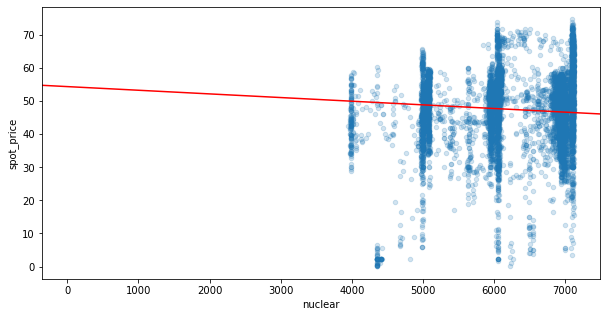

In [49]:
# 7.4. What´s the effect of nuclear power generation on the price of electricity?
energy.plot(y='spot_price',x='nuclear',kind="scatter", figsize=(10, 5), alpha=0.2)
m, b = np.polyfit(x, y, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r')
plt.show()

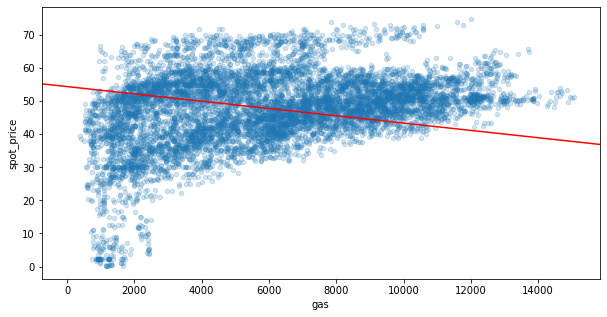

In [50]:
# 7.5. What´s the effect of gas power generation on the price of electricity?
energy.plot(y='spot_price',x='gas',kind="scatter", figsize=(10, 5), alpha=0.2)
m, b = np.polyfit(x, y, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r')
plt.show()

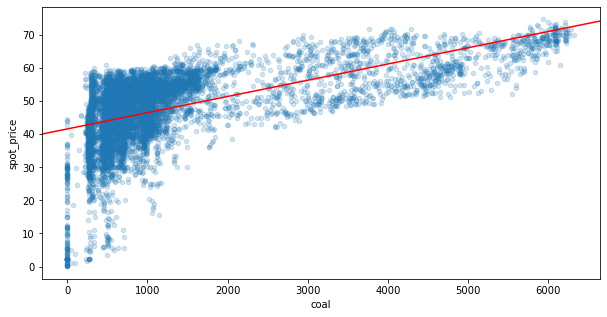

In [51]:
# 7.6. What´s the effect of coal power generation on the price of electricity?
x=energy["coal"]
y=energy["spot_price"]
energy.plot(y='spot_price',x='coal',kind="scatter", figsize=(10, 5), alpha=0.2)
m, a = np.polyfit(x, y, deg=1)
plt.axline(xy1=(0, a), slope=m, color='r')
plt.show()

In [52]:
energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,date,weekend
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,December,31,23,Monday,2018-12-31,False
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,January,1,0,Tuesday,2019-01-01,False
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,January,1,1,Tuesday,2019-01-01,False
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,January,1,2,Tuesday,2019-01-01,False
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,January,1,3,Tuesday,2019-01-01,False


In [53]:
#Extra plot
df = energy[["gas","solar","nuclear","hydro","coal","wind","spot_price","power_demand"]]
corr = df.corr()
corr.style.background_gradient(cmap='YlOrRd')

,gas,solar,nuclear,hydro,coal,wind,spot_price,power_demand
gas,1.000000,0.247081,0.043591,-0.114536,-0.089383,-0.539931,0.359471,0.465950
solar,0.247081,1.000000,0.047449,-0.040042,-0.056729,-0.179670,0.053682,0.425638
nuclear,0.043591,0.047449,1.000000,-0.203778,0.252089,-0.292254,0.191179,0.092873
hydro,-0.114536,-0.040042,-0.203778,1.000000,0.177159,0.085666,0.070018,0.382848
coal,-0.089383,-0.056729,0.252089,0.177159,1.000000,-0.032942,0.591425,0.375170
wind,-0.539931,-0.179670,-0.292254,0.085666,-0.032942,1.000000,-0.354866,0.060931
spot_price,0.359471,0.053682,0.191179,0.070018,0.591425,-0.354866,1.000000,0.533324
power_demand,0.465950,0.425638,0.092873,0.382848,0.375170,0.060931,0.533324,1.000000


<AxesSubplot:xlabel='hour'>

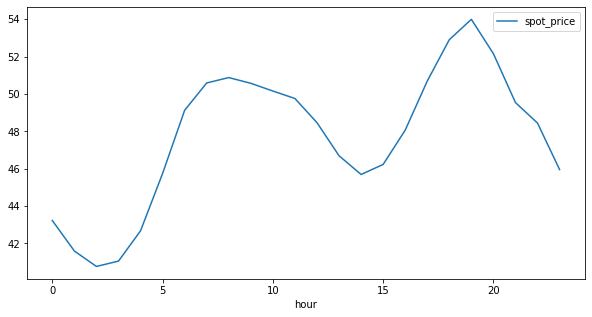

In [54]:
# plotting the average price for each hour of the day

df = energy.groupby("hour")["spot_price"].mean().to_frame().reset_index()
df.plot(x="hour", y="spot_price", figsize=(10, 5))

<AxesSubplot:xlabel='gas', ylabel='wind'>

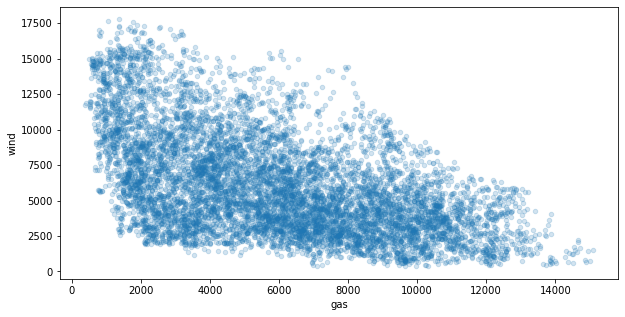

In [55]:
# plotting a scatterplot of gas vs wind generation

energy.plot(x="gas", y="wind", kind="scatter", figsize=(10, 5), alpha=0.2)